In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/pik1989/MLProject-ChurnPrediction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


"SeniorCitizen" is a categorical column, thats why it is not showing proper distribution

75% customers having tenure less than 55 months

Average monthly charges are USD 64.76 whereas 50% customers pay more than $ 70 per month

Text(0.5, 1.0, 'Count of target variable per category')

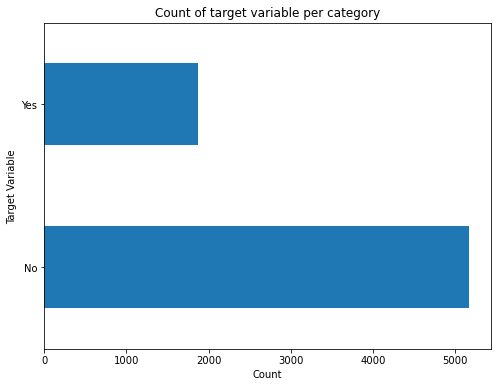

In [8]:
df['Churn'].value_counts().plot(kind="barh", figsize=(8,6))
plt.xlabel('Count')
plt.ylabel('Target Variable')
plt.title('Count of target variable per category')

In [9]:
(df['Churn'].value_counts() / len(df['Churn'])) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- We can see that, the dataset is highly imbalanced dataset as there are 5000 (73%) customers who are not churned and 2000 (27%) are churned

- So we analyse the data with other features while taking the target values separately to get some insights.

In [10]:
# Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset doesn't have any missing values

General Thumb Rules:

- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

### Data Cleaning

1. Create a copy of base data for manupulation & processing

In [11]:
telco_df = df.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [12]:
telco_df.TotalCharges = pd.to_numeric(telco_df.TotalCharges, errors='coerce')

In [13]:
# Let's check for missing values
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As, we can see there are 11 missing values in TotalCharges column. Let's check the records

In [14]:
telco_df.loc[telco_df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Since the % of missing values is very low (barely around 0.15%), lets drop them

In [15]:
# Removing missing values
telco_df.dropna(how='any', inplace=True)

In [16]:
telco_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


5. Divide Customers in bins based on tenure

In [17]:
# what is the max tenure
telco_df['tenure'].max()

72

In [18]:
# Group the tenure in the bins of 12 months
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

telco_df['tenure_group'] = pd.cut(telco_df.tenure, range(1,80,12), right=False, labels=labels)

In [19]:
telco_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [20]:
telco_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36


5. Removing the columns, which are not required for further processing

In [21]:
# Dropping columns customerID and tenure
telco_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

In [22]:
telco_df.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36


## Data Exploration

1. Plot distribution of individual predictors by churn

### Univariate Analysis

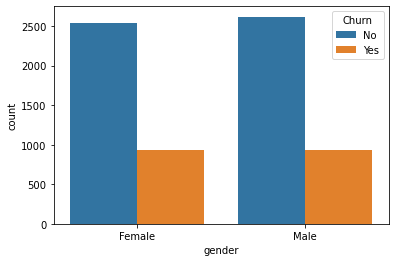

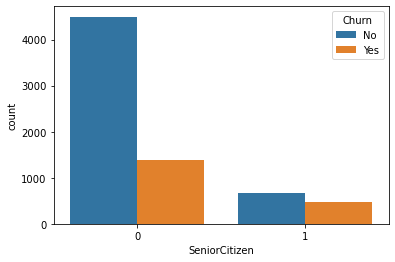

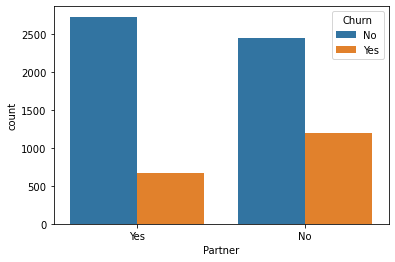

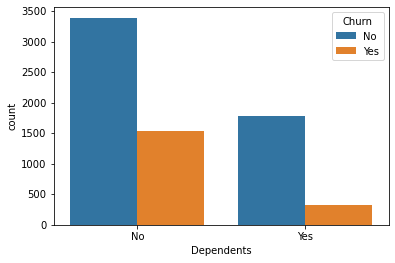

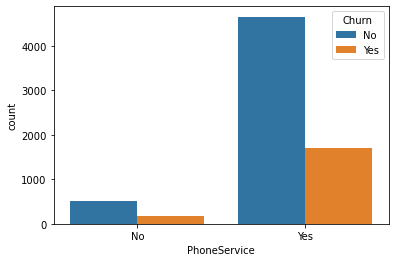

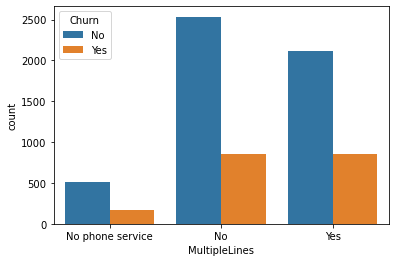

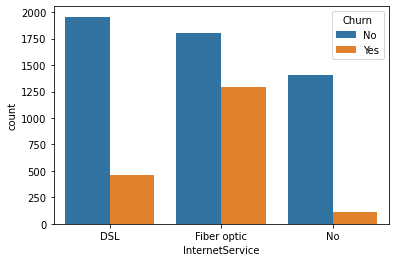

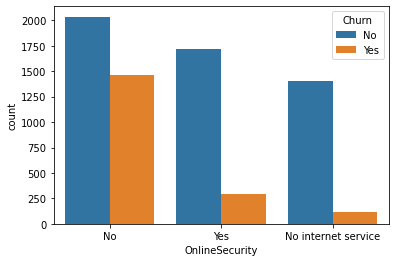

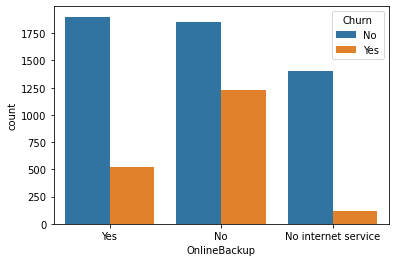

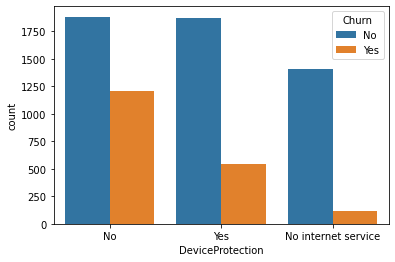

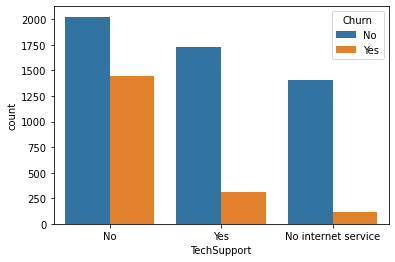

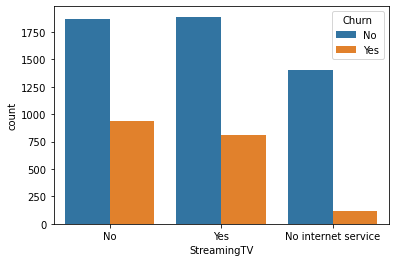

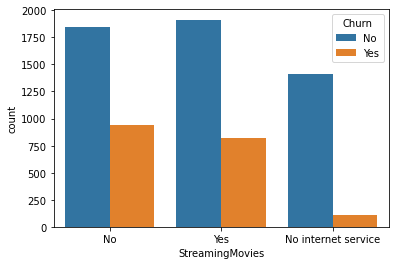

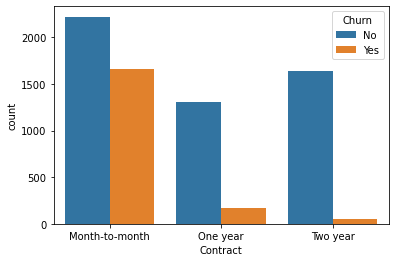

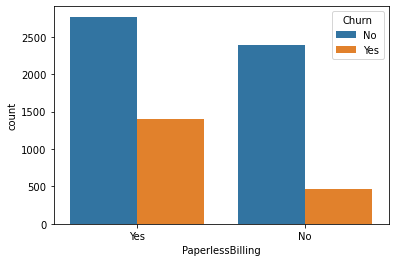

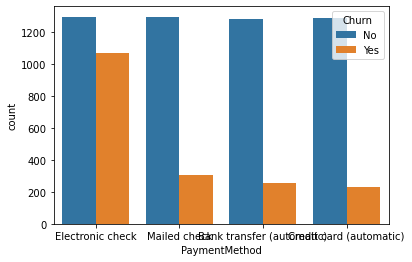

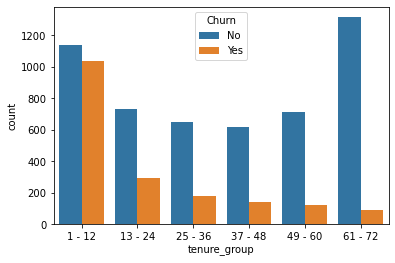

In [23]:
for i, predictor in enumerate(telco_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df, x=predictor, hue='Churn')

2. Convert Churn variable into binary values as: Yes=1, no=0

In [24]:
telco_df['Churn'] = np.where(telco_df.Churn == "Yes", 1,0)

In [25]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all categorical variables into dummy variables

In [26]:
telco_df_dummies = pd.get_dummies(telco_df)
telco_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


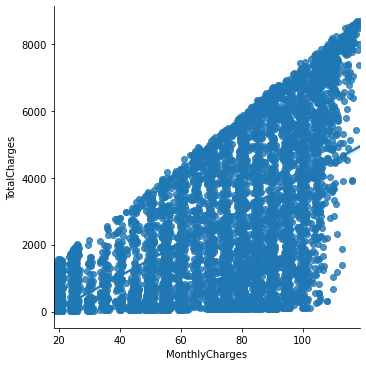

In [27]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(x='MonthlyCharges',y='TotalCharges', data=telco_df_dummies)

As Expected, TotalCharges increases as MonthlyCharges increases

4. Churn by MonthlyCharges and TotalCharges

Text(0.5, 1.0, 'Monthly Charges by Churn')

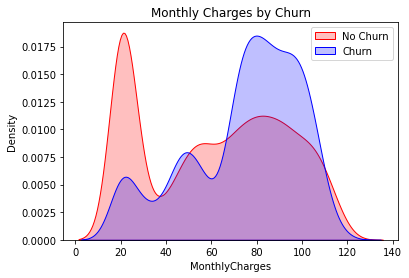

In [28]:
Mth = sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_dummies['Churn']== 0)], color='red', shade=True )
Mth = sns.kdeplot(telco_df_dummies.MonthlyCharges[(telco_df_dummies['Churn']==1)], color='blue', ax=Mth, shade=True)
Mth.legend(['No Churn','Churn'], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('MonthlyCharges')
Mth.set_title('Monthly Charges by Churn')

+ Insight: Churn is High when MonthlyCharges are High

Text(0.5, 1.0, 'Total Charges by Churn')

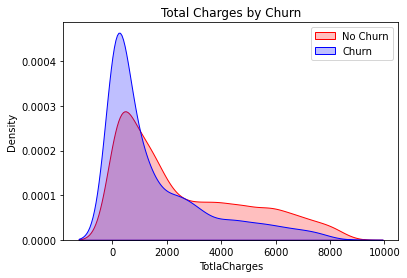

In [29]:
Tot = sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_dummies['Churn']== 0)], color='red', shade=True )
Tot = sns.kdeplot(telco_df_dummies.TotalCharges[(telco_df_dummies['Churn']==1)], color='blue', ax=Tot, shade=True)
Tot.legend(['No Churn','Churn'], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('TotlaCharges')
Tot.set_title('Total Charges by Churn')

Insight: Surprisingly, Churn is higher when Total yearly are high

+ However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

### Build a corelation of all predictors with Churn 

<AxesSubplot:>

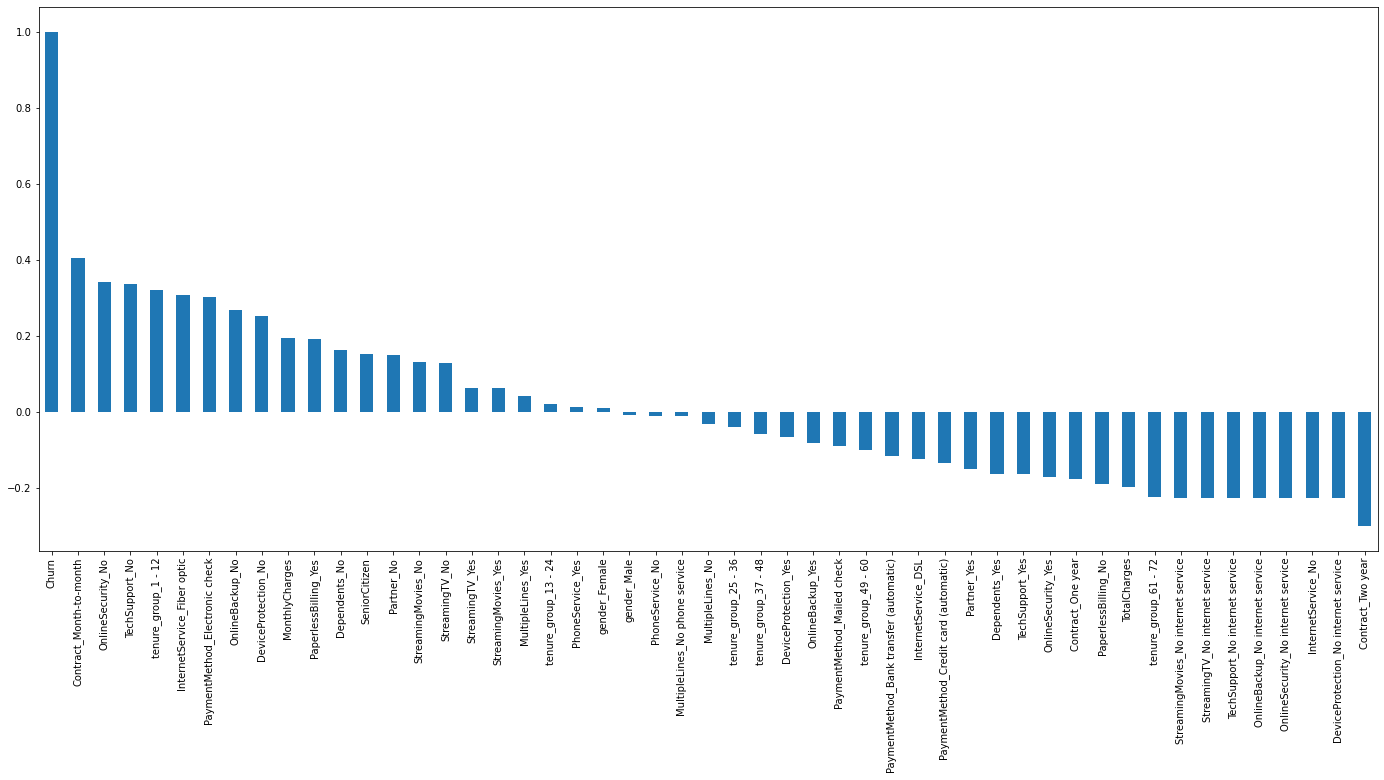

In [30]:
plt.figure(figsize=(24,10))
telco_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

__Derived Insights__:

HIGH Churn seen in case of __Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet__

LOW Churn is seens in case of __Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years__

Factors like __Gender, Availability of PhoneService and # of multiple lines__ have alomost NO impact on Churn

This is also evident from the Heatmap below

<AxesSubplot:>

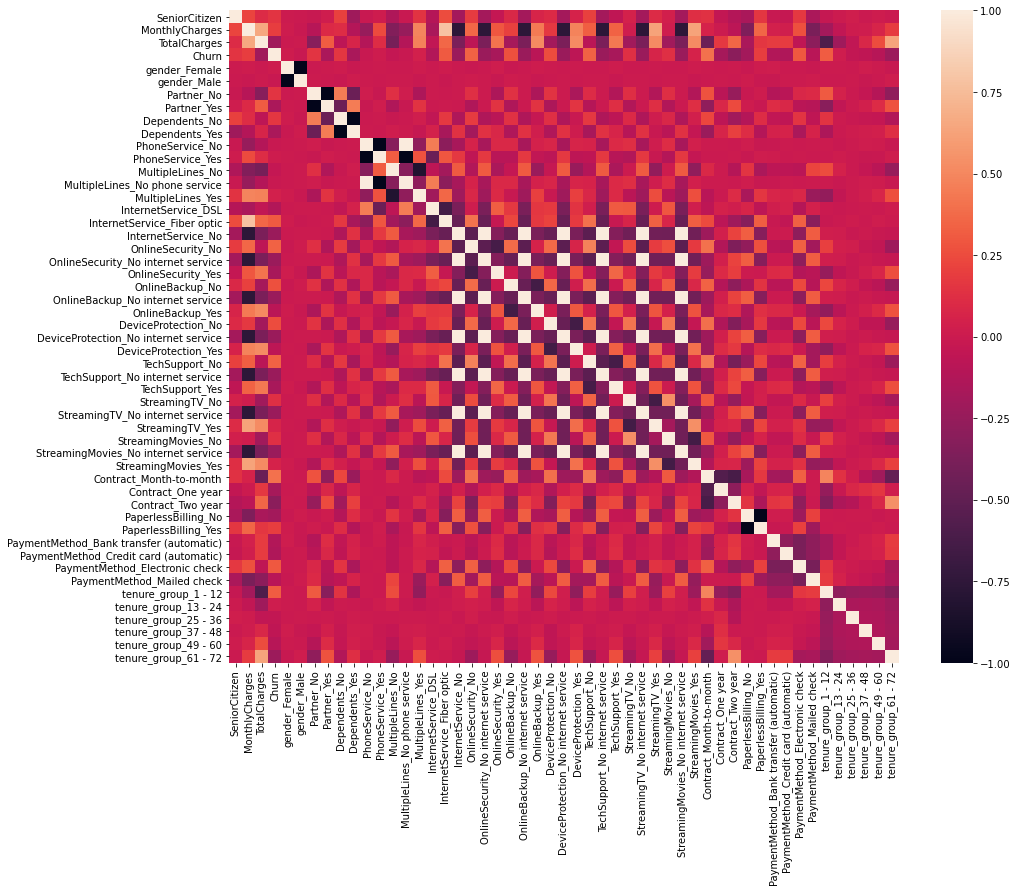

In [31]:
plt.figure(figsize=(15,12))
sns.heatmap(telco_df_dummies.corr())

### Bivariate Analysis

In [32]:
new_df1_target0 = telco_df.loc[telco_df['Churn']==0]
new_df1_target1 = telco_df.loc[telco_df['Churn']==1]

In [33]:
def Uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

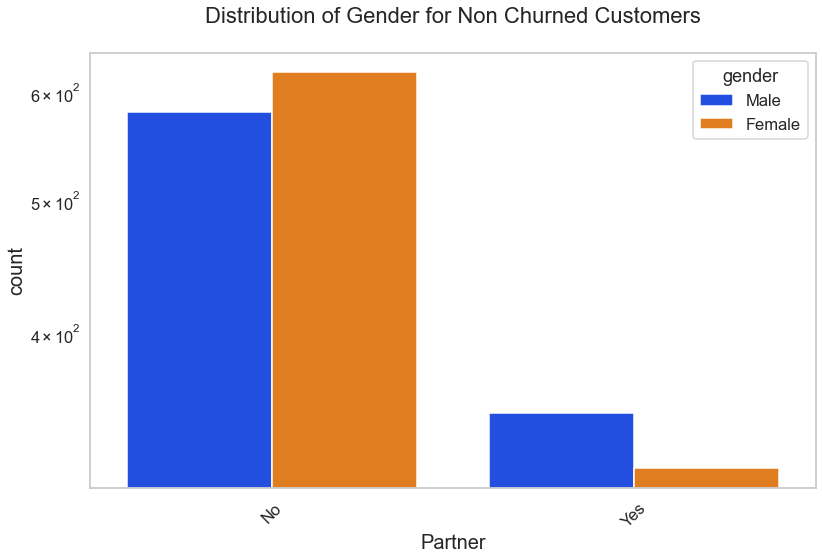

In [34]:
Uniplot(new_df1_target1, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

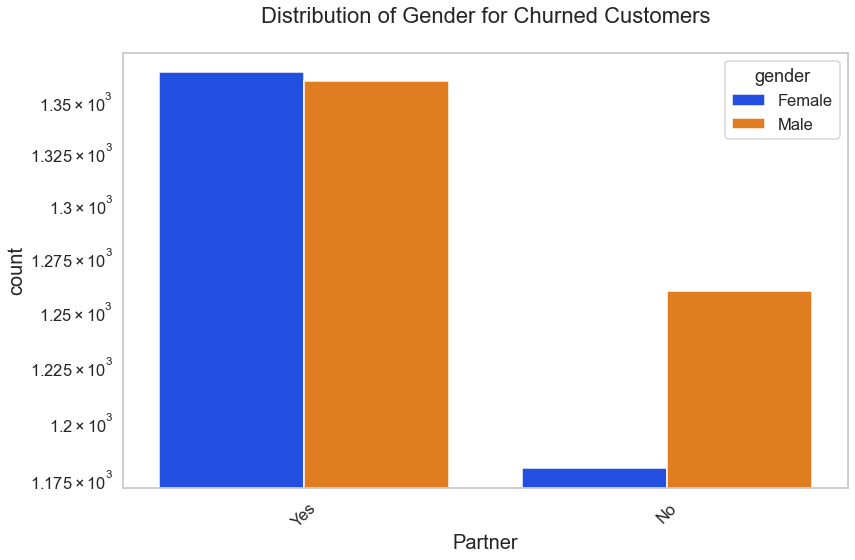

In [35]:
Uniplot(new_df1_target0, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

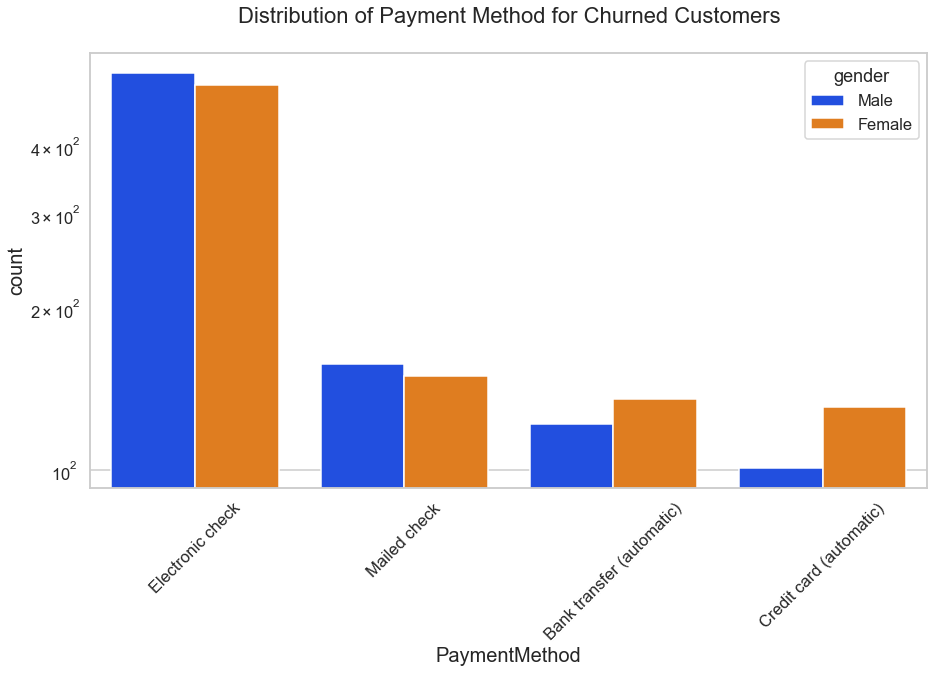

In [36]:
Uniplot(new_df1_target1, col='PaymentMethod', title='Distribution of Payment Method for Churned Customers', hue='gender')

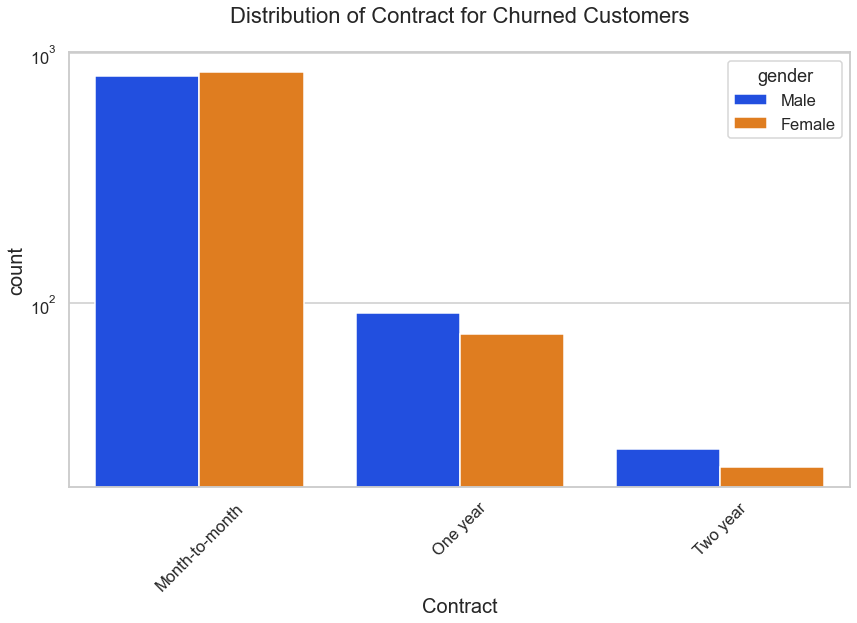

In [37]:
Uniplot(new_df1_target1, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

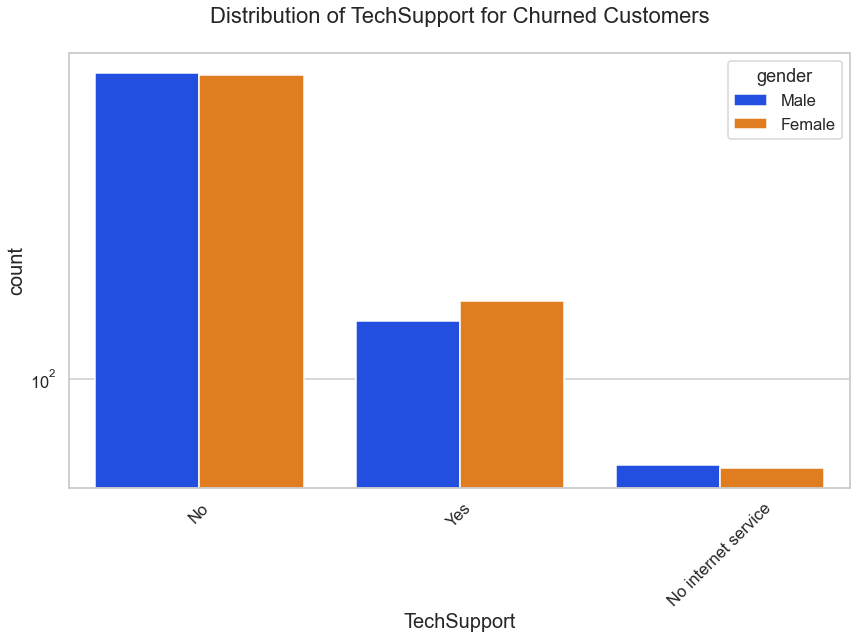

In [38]:
Uniplot(new_df1_target1, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

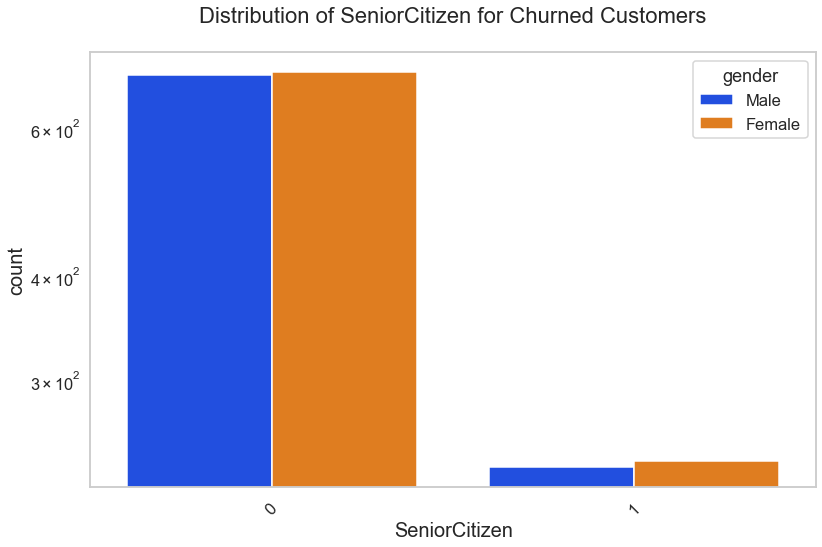

In [39]:
Uniplot(new_df1_target1, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

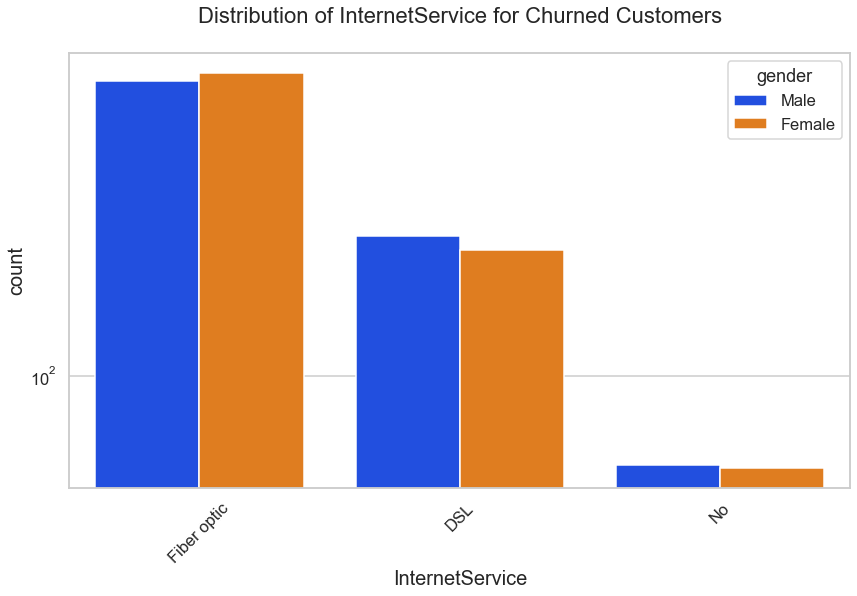

In [40]:
Uniplot(new_df1_target1, col='InternetService', title='Distribution of InternetService for Churned Customers', hue='gender')

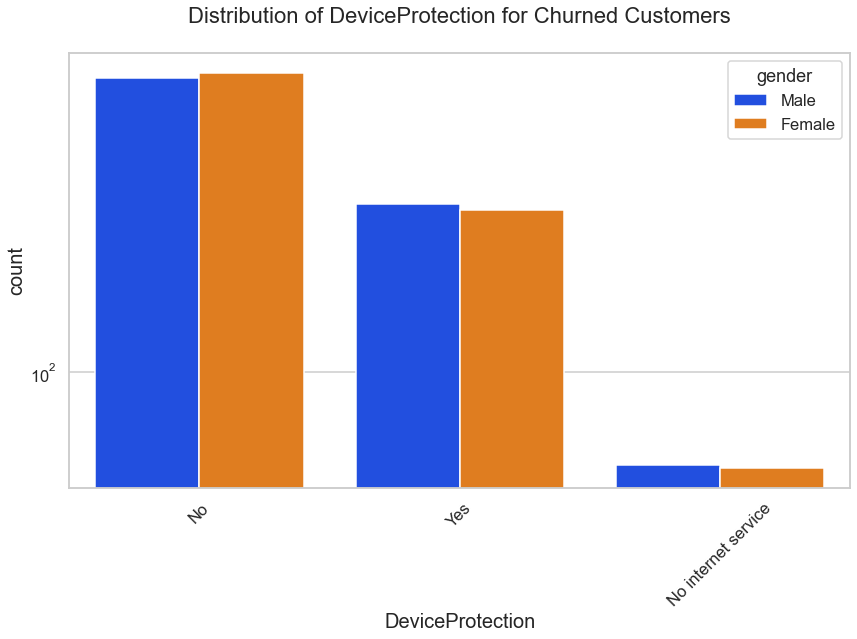

In [41]:
Uniplot(new_df1_target1, col='DeviceProtection', title='Distribution of DeviceProtection for Churned Customers', hue='gender')

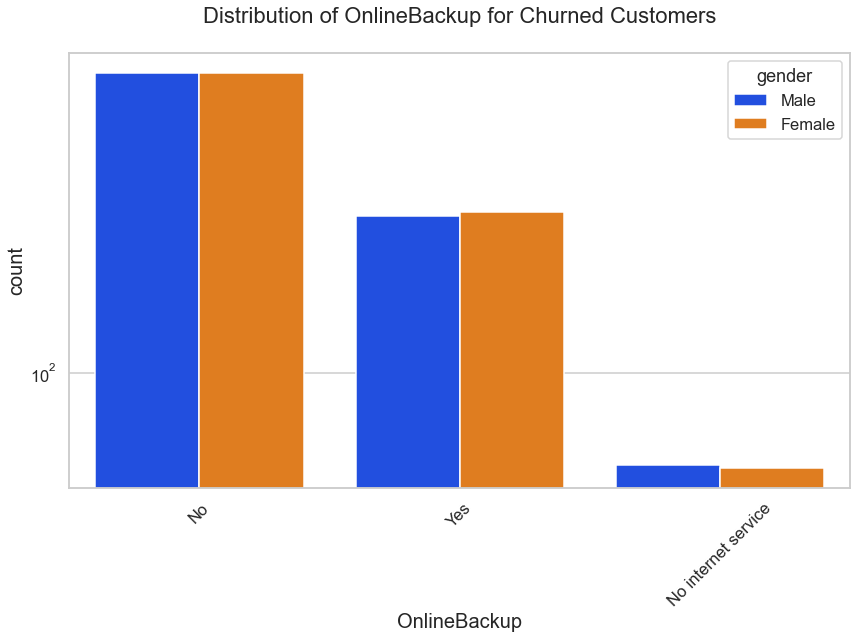

In [42]:
Uniplot(new_df1_target1, col='OnlineBackup', title='Distribution of OnlineBackup for Churned Customers', hue='gender')

__These are some of the quick insights from this exercise:__

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners
5. Customer's with Fibre Optic service are high churners

# Model Building

In [43]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [44]:
from imblearn.combine import SMOTEENN

In [45]:
telco_df_dummies.to_csv('tel_churn.csv')

In [46]:
df_final = pd.read_csv('tel_churn.csv')

In [47]:
df_final.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [48]:
df_final.drop('Unnamed: 0', axis=1, inplace=True)

In [49]:
df_final.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


### Creating X and y variables

In [50]:
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

In [51]:
X.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [52]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 50)
(1407, 50)
(5625,)
(1407,)


## Decision Tree Classifier

In [55]:
model_dt = DecisionTreeClassifier()

In [56]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
y_predict = model_dt.predict(X_test)

In [58]:
accuracy_score(y_test, y_predict)

0.7228144989339019

In [59]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.50      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



In [60]:
print(confusion_matrix(y_test, y_predict))

[[829 204]
 [186 188]]


In [61]:
model_dt.score(X_train, y_train)

0.9976888888888888

#### Try to tune Hyperparameters

In [62]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    }

In [63]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model_dt, param_grid=grid_param, cv=5)

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [65]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'splitter': 'random'}

In [66]:
model_with_best_params = DecisionTreeClassifier(criterion= 'gini',max_depth= 5,min_samples_leaf= 5,min_samples_split= 6,splitter='random')

In [67]:
model_with_best_params.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=6,
                       splitter='random')

In [68]:
y_predict2 = model_with_best_params.predict(X_test)

In [69]:
accuracy_score(y_test, y_predict2)

0.7604832977967306

In [70]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.56      0.55       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



In [71]:
print(confusion_matrix(y_test, y_predict2))

[[860 173]
 [164 210]]


## Dealing with imbalanced Dataset using SMOTE

In [72]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [73]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled,y_resampled, test_size=0.20, random_state=42)

In [74]:
model_dt_smote = DecisionTreeClassifier()

In [75]:
model_dt_smote.fit(Xr_train, yr_train)

DecisionTreeClassifier()

In [76]:
y_predict_smote = model_dt_smote.predict(Xr_test)

In [77]:
accuracy_score(yr_test, y_predict_smote)

0.9365351629502573

In [78]:
print(classification_report(yr_test, y_predict_smote))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       541
           1       0.94      0.94      0.94       625

    accuracy                           0.94      1166
   macro avg       0.94      0.94      0.94      1166
weighted avg       0.94      0.94      0.94      1166



In [79]:
print(confusion_matrix(yr_test, y_predict_smote))

[[505  36]
 [ 38 587]]


In [80]:
# Let's again tune the hyperparameters
grid_search.fit(Xr_train, yr_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [81]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [82]:
model_with_best_params_smote = DecisionTreeClassifier(criterion= 'gini',max_depth= 8,min_samples_leaf= 1,min_samples_split= 5,splitter='best')

In [83]:
model_with_best_params_smote.fit(Xr_train, yr_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=5)

In [84]:
y_predict2_smote = model_with_best_params_smote.predict(Xr_test)

In [85]:
accuracy_score(yr_test, y_predict2_smote)

0.9408233276157805

In [86]:
print(classification_report(yr_test, y_predict2_smote))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       541
           1       0.95      0.94      0.94       625

    accuracy                           0.94      1166
   macro avg       0.94      0.94      0.94      1166
weighted avg       0.94      0.94      0.94      1166



In [87]:
print(confusion_matrix(yr_test, y_predict2_smote))

[[507  34]
 [ 35 590]]


- __We can see that , tuning the hyperparameters doesn't make any marginal difference, so in the this case it is not required.__

## Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model_rf = RandomForestClassifier()

In [90]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
y_predict_rf = model_rf.predict(X_test)

In [92]:
accuracy_score(y_test, y_predict_rf)

0.7697228144989339

In [93]:
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.59      0.44      0.50       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.68      1407
weighted avg       0.75      0.77      0.76      1407



In [94]:
print(confusion_matrix(y_test, y_predict_rf))

[[918 115]
 [209 165]]


In [95]:
#Let's try using X and y resampled using SMOTE
model_rf_smote = RandomForestClassifier()

In [96]:
model_rf_smote.fit(Xr_train, yr_train)

RandomForestClassifier()

In [97]:
y_predict_rf_smote = model_rf_smote.predict(Xr_test)

In [98]:
accuracy_score(yr_test, y_predict_rf_smote)

0.951114922813036

In [99]:
print(classification_report(yr_test, y_predict_rf_smote))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       541
           1       0.96      0.95      0.95       625

    accuracy                           0.95      1166
   macro avg       0.95      0.95      0.95      1166
weighted avg       0.95      0.95      0.95      1166



In [100]:
print(confusion_matrix(yr_test, y_predict_rf_smote))

[[513  28]
 [ 29 596]]


# Saving the Model

In [101]:
import pickle

In [102]:
#filename = 'rf_churn_model.sav'

In [103]:
pickle.dump(model_rf_smote, open('Churn_model_rf_smote.pkl', 'wb'))

In [104]:
load_model = pickle.load(open('Churn_model_rf_smote.pkl','rb'))

In [105]:
load_model.score(Xr_test, yr_test)

0.951114922813036